1. Подготовка данных:
• Используйте датасет CIFAR-10 или другой из OpenML/Kaggle.
• Выполните предварительную обработку: нормализация пиксельных
значений изображений.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Нормализация пиксельных значений
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

#Преобразование меток
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)

Train images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


2. Применение методов нормализации:
• Постройте полносвязную или сверточную нейронную сеть и обучите
её без нормализации данных.

In [ ]:
def create_baseline_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

#Построение модели
baseline_model = create_baseline_model()
baseline_history = baseline_model.fit(train_images, train_labels,
                                     epochs=10, batch_size=256,
                                     validation_data=(test_images, test_labels),
                                     verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.2486 - loss: 2.0697 - val_accuracy: 0.3545 - val_loss: 1.7922
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.3831 - loss: 1.7269 - val_accuracy: 0.4044 - val_loss: 1.6703
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.4174 - loss: 1.6316 - val_accuracy: 0.4299 - val_loss: 1.5977
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.4433 - loss: 1.5703 - val_accuracy: 0.4473 - val_loss: 1.5367
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.4615 - loss: 1.5076 - val_accuracy: 0.4594 - val_loss: 1.5193
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.4739 - loss: 1.4745 - val_accuracy: 0.4644 - val_loss: 1.4941
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.4860 - loss: 1.4487 - val_accuracy: 0.4634 - val_loss: 1.4828
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - accuracy: 0.5038 - loss: 1.3916 - 

Batch Normalization

In [ ]:
def create_bn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

#Построение модели
bn_model = create_bn_model()
bn_history = bn_model.fit(train_images, train_labels,
                          epochs=10, batch_size=256,
                          validation_data=(test_images, test_labels),
                          verbose=1)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.3781 - loss: 1.7681 - val_accuracy: 0.2990 - val_loss: 2.0177
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 65ms/step - accuracy: 0.5104 - loss: 1.3777 - val_accuracy: 0.2850 - val_loss: 2.0715
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.5571 - loss: 1.2580 - val_accuracy: 0.3138 - val_loss: 2.0347
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.5937 - loss: 1.1490 - val_accuracy: 0.4046 - val_loss: 1.7228
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.6200 - loss: 1.0661 - val_accuracy: 0.4224 - val_loss: 1.6867
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6578 - loss: 0.9683 - val_accuracy: 0.4077 - val_loss: 1.7667
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.6924 - loss: 0.8833 - val_accuracy: 0.4293 - val_loss: 1.7342
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.7142 - loss: 0.8150 - 

Layer Normalization

In [ ]:
def create_ln_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512),
        layers.LayerNormalization(),
        layers.Activation('relu'),
        layers.Dense(256),
        layers.LayerNormalization(),
        layers.Activation('relu'),
        layers.Dense(128),
        layers.LayerNormalization(),
        layers.Activation('relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

#Построение модели
ln_model = create_ln_model()
ln_history = ln_model.fit(train_images, train_labels,
                          epochs=10, batch_size=256,
                          validation_data=(test_images, test_labels),
                          verbose=1)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - accuracy: 0.2233 - loss: 2.1161 - val_accuracy: 0.3594 - val_loss: 1.7759
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.3769 - loss: 1.7288 - val_accuracy: 0.4281 - val_loss: 1.6066
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.4301 - loss: 1.5977 - val_accuracy: 0.4426 - val_loss: 1.5610
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.4579 - loss: 1.5241 - val_accuracy: 0.4623 - val_loss: 1.5100
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.4698 - loss: 1.4821 - val_accuracy: 0.4668 - val_loss: 1.4915
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.4879 - loss: 1.4386 - val_accuracy: 0.4847 - val_loss: 1.4643
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.4990 - loss: 1.4035 - val_accuracy: 0.4741 - val_loss: 1.4635
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - accuracy: 0.5168 - loss: 1.3639 - 

Dropout

In [ ]:
def create_dropout_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

#Построение модели
dropout_model = create_dropout_model()
dropout_history = dropout_model.fit(train_images, train_labels,
                                    epochs=10, batch_size=256,
                                    validation_data=(test_images, test_labels),
                                    verbose=1)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 62ms/step - accuracy: 0.1327 - loss: 2.3676 - val_accuracy: 0.2551 - val_loss: 2.0364
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.1935 - loss: 2.1074 - val_accuracy: 0.2697 - val_loss: 2.0053
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.2076 - loss: 2.0694 - val_accuracy: 0.2635 - val_loss: 2.0213
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.2179 - loss: 2.0518 - val_accuracy: 0.2708 - val_loss: 2.0022
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.2214 - loss: 2.0418 - val_accuracy: 0.2780 - val_loss: 2.0047
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.2284 - loss: 2.0179 - val_accuracy: 0.2777 - val_loss: 1.9807
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - accuracy: 0.2283 - loss: 2.0105 - val_accuracy: 0.2596 - val_loss: 1.9849
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.2281 - loss: 2.0159 - 

3. Анализ:
• Сравните результаты обучения при использовании разных методов
нормализации.
• Оцените уровень переобучения и скорость сходимости для каждого
метода.

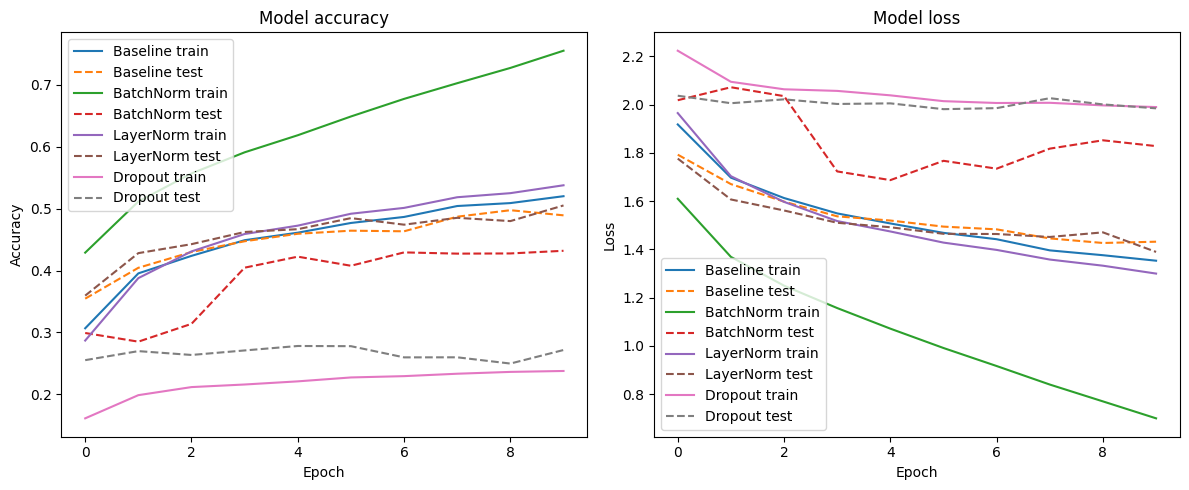


Переобучение (разница между train и test accuracy):
Baseline: 0.0309
BatchNorm: 0.3234
LayerNorm: 0.0326
Dropout: -0.0339

Скорость сходимости (эпохи до стабилизации val_accuracy):
Baseline: 10 эпох
BatchNorm: 10 эпох
LayerNorm: 10 эпох
Dropout: 10 эпох


In [ ]:
def plot_history(histories, labels):
    plt.figure(figsize=(12, 5))

    #График точности
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history.history['accuracy'], label=f'{label} train')
        plt.plot(history.history['val_accuracy'], '--', label=f'{label} test')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()

    #График потерь
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f'{label} train')
        plt.plot(history.history['val_loss'], '--', label=f'{label} test')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()

    plt.tight_layout()
    plt.show()

#Сравнение всех моделей
histories = [baseline_history, bn_history, ln_history, dropout_history]
labels = ['Baseline', 'BatchNorm', 'LayerNorm', 'Dropout']
plot_history(histories, labels)

#Анализ переобучения
final_train_acc = [h.history['accuracy'][-1] for h in histories]
final_val_acc = [h.history['val_accuracy'][-1] for h in histories]
overfitting_gap = [train - val for train, val in zip(final_train_acc, final_val_acc)]

print("\nПереобучение (разница между train и test accuracy):")
for label, gap in zip(labels, overfitting_gap):
    print(f"{label}: {gap:.4f}")

#Анализ скорости сходимости (сколько эпох до стабилизации)
def epochs_to_converge(history, metric='val_accuracy', window=5, threshold=0.001):
    values = history.history[metric]
    for i in range(len(values)-window):
        if max(values[i:i+window]) - min(values[i:i+window]) < threshold:
            return i
    return len(values)

print("\nСкорость сходимости (эпохи до стабилизации val_accuracy):")
for label, history in zip(labels, histories):
    print(f"{label}: {epochs_to_converge(history)} эпох")

4. Визуализация:
• Постройте графики потерь (loss) и точности для всех методов
нормализации.

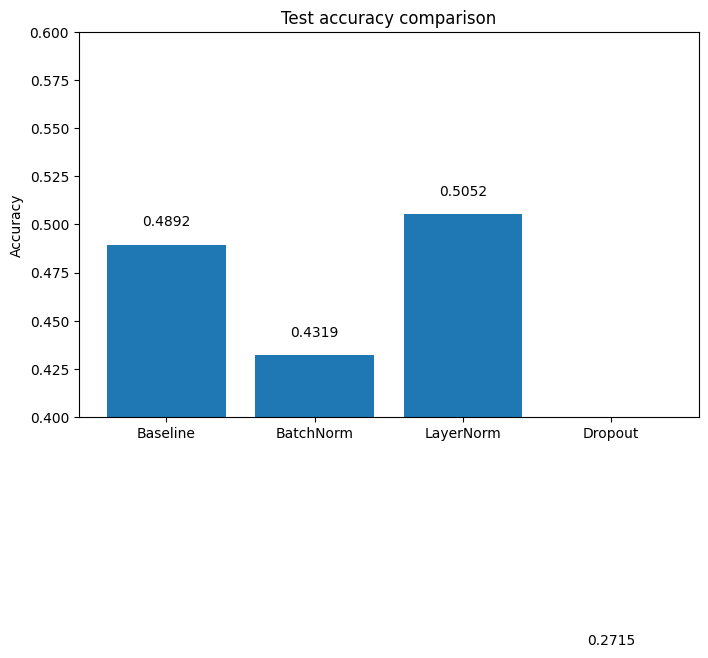

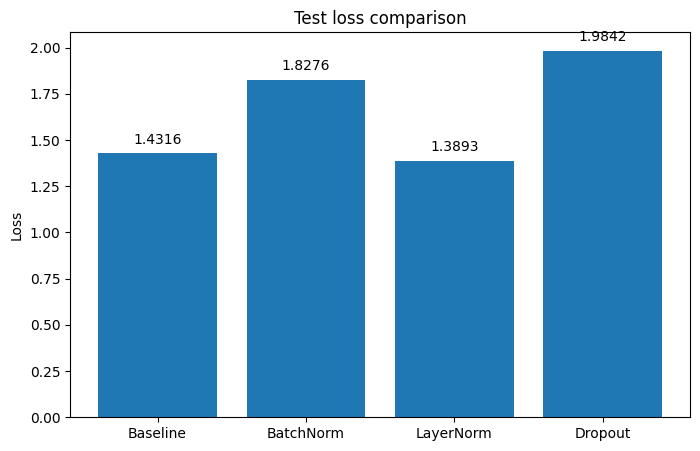

In [ ]:
#Сравнение точности на тестовом наборе
test_accuracies = [model.evaluate(test_images, test_labels, verbose=0)[1] for model in
                  [baseline_model, bn_model, ln_model, dropout_model]]

plt.figure(figsize=(8, 5))
plt.bar(labels, test_accuracies)
plt.title('Test accuracy comparison')
plt.ylabel('Accuracy')
plt.ylim(0.4, 0.6)
for i, acc in enumerate(test_accuracies):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center')
plt.show()

#Сравнение потерь на тестовом наборе
test_losses = [model.evaluate(test_images, test_labels, verbose=0)[0] for model in
               [baseline_model, bn_model, ln_model, dropout_model]]

plt.figure(figsize=(8, 5))
plt.bar(labels, test_losses)
plt.title('Test loss comparison')
plt.ylabel('Loss')
for i, loss in enumerate(test_losses):
    plt.text(i, loss + 0.05, f"{loss:.4f}", ha='center')
plt.show()

1. Выбор архитектур:
• Обучите три разные архитектуры сверточных сетей на одном и том же
наборе данных:
• ResNet (Residual Networks)
• VGG (Very Deep Convolutional Networks)
• MobileNet (для мобильных и маломощных устройств)

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset, DataLoader

#Трансформации для обучения и теста
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

full_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
full_test  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
subset_size = len(full_train) // 10
indices = torch.randperm(len(full_train))[:subset_size]
train_subset = Subset(full_train, indices)

#DataLoader
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader  = DataLoader(full_test,    batch_size=batch_size, shuffle=False, num_workers=2)

2. Эксперименты:
• Проведите обучение для 20 эпох, используя одинаковые
гиперпараметры (learning rate, batch size).


In [ ]:
import torchvision.models as models
import torch.nn as nn

from torchvision import models
import torch.nn as nn

def get_models(num_classes=10):
    #ResNet18
    resnet = models.resnet18(pretrained=False)
    resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

    #VGG11
    vgg = models.vgg11(pretrained=False)
    vgg.classifier[6] = nn.Linear(vgg.classifier[6].in_features, num_classes)

    #MobileNet
    mobile = models.mobilenet_v3_small(pretrained=False)
    mobile.classifier[3] = nn.Linear(mobile.classifier[3].in_features, num_classes)

    return {'ResNet18': resnet, 'VGG11': vgg, 'MobileNetV3-Small': mobile}



models_dict = get_models()

import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
import time

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Гиперпараметры
lr = 0.001
num_epochs = 20

#Функция тренировки одной модели

def train_and_eval(model, name):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    writer = SummaryWriter(log_dir=f'runs/{name}')

    history = {'train_loss': [], 'train_acc': [], 'test_acc': []}
    start_time = time.time()

    for epoch in range(1, num_epochs+1):
        #Тренировочная фаза
        model.train()
        correct = total = running_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()*inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        train_loss = running_loss/total
        train_acc  = correct/total
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        #Тестовая фаза
        model.eval()
        correct = total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                correct += (preds == labels).sum().item()
                total += labels.size(0)
        test_acc = correct/total
        history['test_acc'].append(test_acc)

        writer.add_scalar('Loss/train', train_loss, epoch)
        writer.add_scalar('Accuracy/train', train_acc, epoch)
        writer.add_scalar('Accuracy/test', test_acc, epoch)

        print(f"{name} Epoch {epoch}/{num_epochs} — loss: {train_loss:.4f}, train_acc: {train_acc:.4f}, test_acc: {test_acc:.4f}")

    total_time = time.time() - start_time
    writer.close()
    return history, total_time

#Запуск обучения для всех моделей
histories = {}
times = {}
for name, model in models_dict.items():
    hist, t = train_and_eval(model, name)
    histories[name] = hist
    times[name] = t

ResNet18 Epoch 1/20 — loss: 1.9101, train_acc: 0.3248, test_acc: 0.4028
ResNet18 Epoch 2/20 — loss: 1.5024, train_acc: 0.4494, test_acc: 0.4433
ResNet18 Epoch 3/20 — loss: 1.3076, train_acc: 0.5392, test_acc: 0.4557
ResNet18 Epoch 4/20 — loss: 1.1439, train_acc: 0.5860, test_acc: 0.4734
ResNet18 Epoch 5/20 — loss: 1.0250, train_acc: 0.6368, test_acc: 0.4530
ResNet18 Epoch 6/20 — loss: 0.8942, train_acc: 0.6854, test_acc: 0.4926
ResNet18 Epoch 7/20 — loss: 0.6456, train_acc: 0.7760, test_acc: 0.5079
ResNet18 Epoch 8/20 — loss: 0.5473, train_acc: 0.8068, test_acc: 0.4976
ResNet18 Epoch 9/20 — loss: 0.4714, train_acc: 0.8394, test_acc: 0.5138
ResNet18 Epoch 10/20 — loss: 0.4195, train_acc: 0.8544, test_acc: 0.5154
ResNet18 Epoch 11/20 — loss: 0.2703, train_acc: 0.9018, test_acc: 0.5245
ResNet18 Epoch 12/20 — loss: 0.2562, train_acc: 0.9106, test_acc: 0.5164
ResNet18 Epoch 13/20 — loss: 0.2374, train_acc: 0.9186, test_acc: 0.5118
ResNet18 Epoch 14/20 — loss: 0.2278, train_acc: 0.9214, test

• Визуализируйте процесс обучения через TensorBoard или Matplotlib.

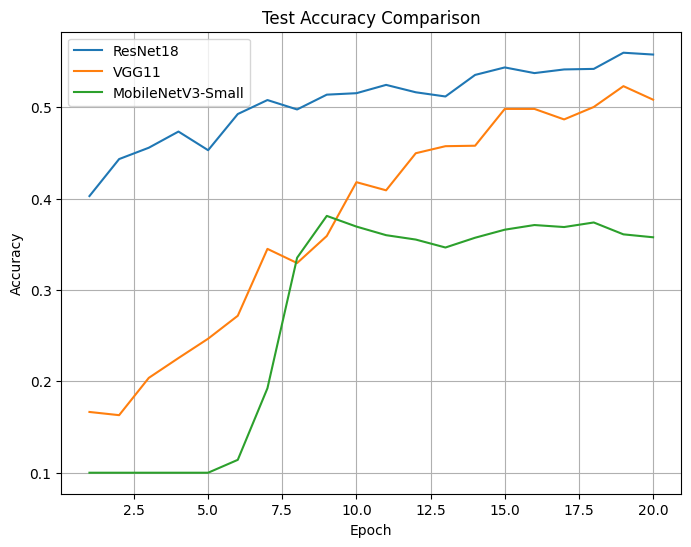

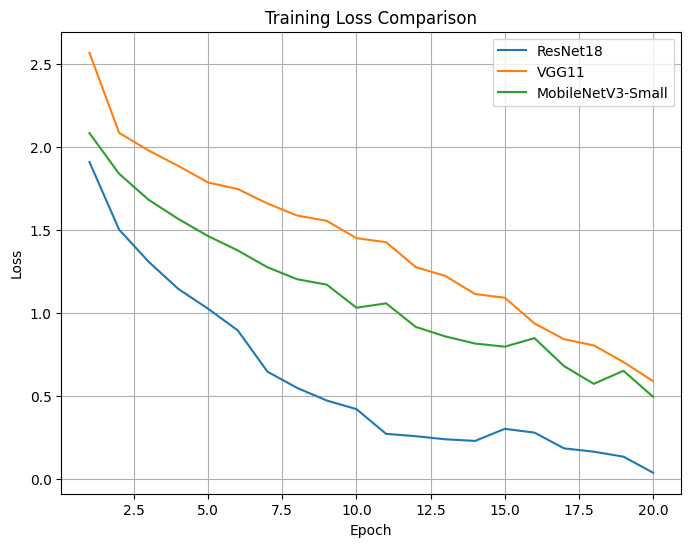

In [ ]:
import matplotlib.pyplot as plt

#График точности на тесте
plt.figure(figsize=(8,6))
for name, hist in histories.items():
    plt.plot(range(1, num_epochs+1), hist['test_acc'], label=name)
plt.title('Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#График потерь на обучении
plt.figure(figsize=(8,6))
for name, hist in histories.items():
    plt.plot(range(1, num_epochs+1), hist['train_loss'], label=name)
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

3. Сравнительный анализ:
• Сравните точность на тестовой выборке, количество параметров и
время обучения каждой архитектуры.
• Проанализируйте, какая архитектура лучше справляется с
переобучением.

In [ ]:
#1) Количество параметров
def count_params(model):
    return sum(p.numel() for p in model.parameters())

params = {name: count_params(models_dict[name]) for name in models_dict}
print("Параметры (количество):")
for name, p in params.items():
    print(f"{name}: {p:,}")

#2) Время обучения
print("\nВремя обучения (секунды):")
for name, t in times.items():
    print(f"{name}: {t:.1f}s")

#3) Итоговая точность на тесте
acc = {name: histories[name]['test_acc'][-1] for name in histories}
print("\nТестовая точность (последняя эпоха):")
for name, a in acc.items():
    print(f"{name}: {a:.4f}")

Параметры (количество):
ResNet18: 11,181,642
VGG11: 128,807,306
MobileNetV3-Small: 1,528,106

Время обучения (секунды):
ResNet18: 1895.2s
VGG11: 10878.2s
MobileNetV3-Small: 862.1s

Тестовая точность (последняя эпоха):
ResNet18: 0.5577
VGG11: 0.5083
MobileNetV3-Small: 0.3577
